# 1. Analyse Exploratoire (E.D.A )

## 1.1 - Analysis univariee

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
df = sns.load_dataset('iris')

In [3]:
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


    - affichier le nombre columns et de lignes

In [4]:
df.shape

(150, 5)

On voit qu'on a *150* lignes et *5* colonne

    - Affichier le noms des columns

In [5]:
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

    - Afficher les colonnes et leur type

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


    - Affichier seulement le type de colonne

In [7]:
df.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

    - Afficher les statistiques sommaires : maximum(min), minium (min), l'ecart type(std), le nombre total d'entree (count), et les 3 quantiles (25%, 50%, 75%)

In [8]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


    - Verifie le nombre de valeur nul par colonne

In [9]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

    - Verifier les doublons

In [10]:
df[df.duplicated()]

,sepal_length,sepal_width,petal_length,petal_width,species
142,5.8,2.7,5.1,1.9,virginica


In [11]:
df[df.duplicated(keep=False)]

,sepal_length,sepal_width,petal_length,petal_width,species
101,5.8,2.7,5.1,1.9,virginica
142,5.8,2.7,5.1,1.9,virginica


    - Affichier la repartition de la variable cible

    -Histogramme

In [12]:
df['species'].value_counts()

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

<AxesSubplot:>

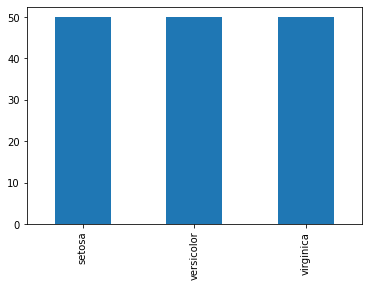

In [13]:
df['species'].value_counts().plot(kind='bar')

    - En secteurs

<AxesSubplot:ylabel='species'>

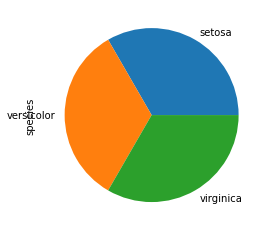

In [14]:
df['species'].value_counts().plot(kind='pie')

## 1. La boite a moustache

    - La boite a moustache nous permet de detecter les outliers (les valeurs aberantes), les valeurs aberantes sont toujours eloignes de la distribution des donnees

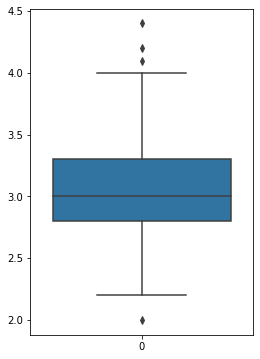

In [15]:
plt.figure(figsize=(4, 6))
sns.boxplot(data=df['sepal_width'])
plt.show()

    - Afficher la distrubition d'une colonne, la boite a moustache et la densite, respectivement cela permet de connaitre la repartition des donnees, les valeurs aberantes, l'ordre de grandeur des valeurs prise par cette colonne

In [39]:
def distrubiton_col(data):
    
    fig, ax = plt.subplots(3, 1, figsize=(10, 6))
    data.plot(kind='hist', ax=ax[0])
    
    data.plot(kind='box', ax=ax[1], vert=False)
    
    data.plot(kind='density', ax=ax[2])
    
    plt.show()

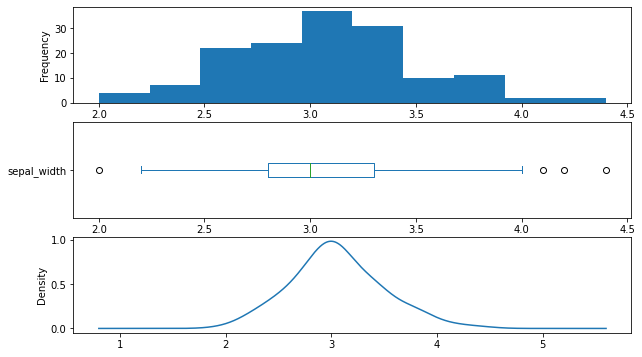

In [40]:
distrubiton_col(df['sepal_width'])

## 2.1 Analyse multivariee

In [41]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


    -Affichier la correlation entre les variables numeriques

In [42]:
df.corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.117570,0.871754,0.817941
sepal_width,-0.117570,1.000000,-0.428440,-0.366126
petal_length,0.871754,-0.428440,1.000000,0.962865
petal_width,0.817941,-0.366126,0.962865,1.000000


    - Afficher la relation entre deux variables continues

<AxesSubplot:xlabel='sepal_length', ylabel='petal_length'>

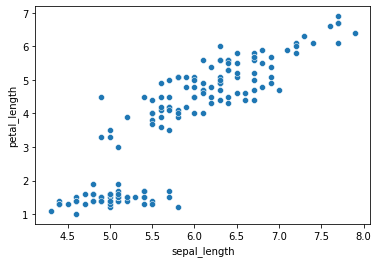

In [43]:
sns.scatterplot(data=df, x='sepal_length', y='petal_length')

    - Afficher la relation lineair entre tous les varaibles continues

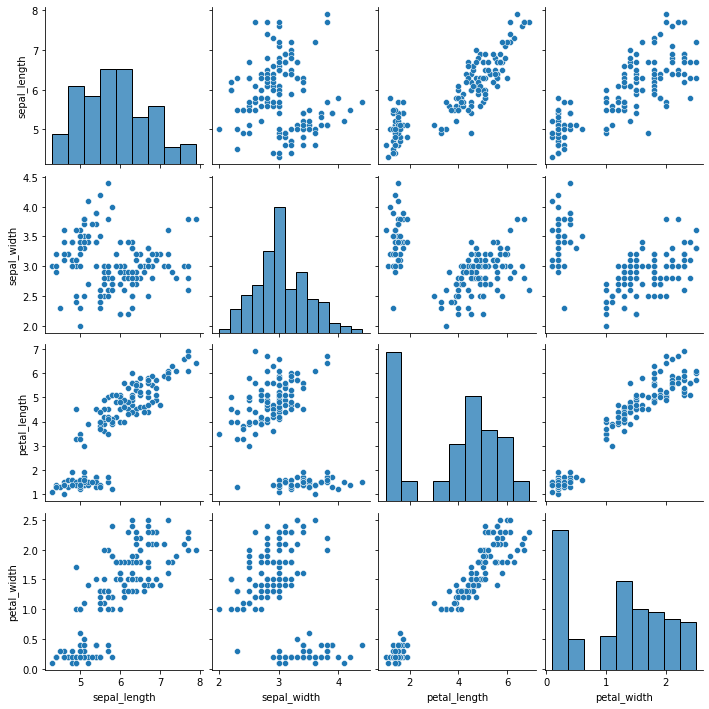

In [44]:
sns.pairplot(df)

    - Afficher la distrubition de la frequence des valeurs

array([[<AxesSubplot:title={'center':'sepal_length'}>,
        <AxesSubplot:title={'center':'sepal_width'}>],
       [<AxesSubplot:title={'center':'petal_length'}>,
        <AxesSubplot:title={'center':'petal_width'}>]], dtype=object)

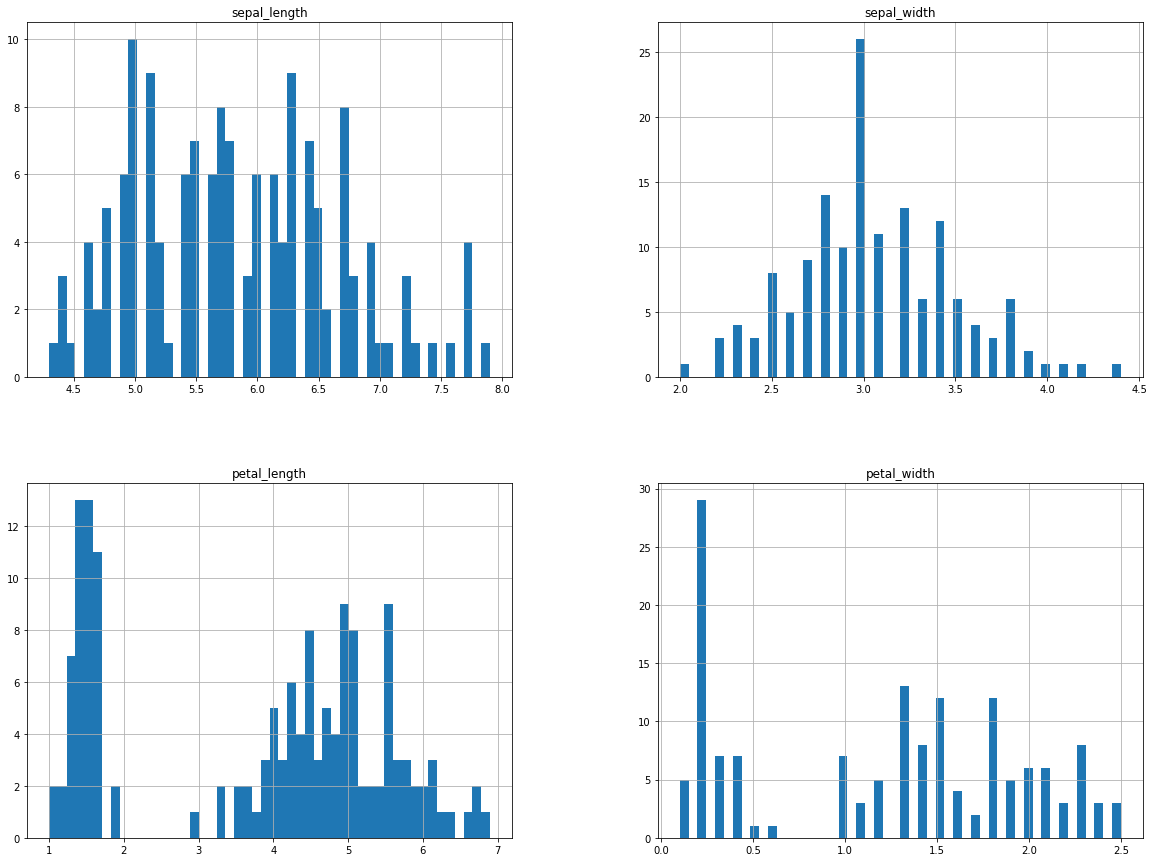

In [45]:
df.hist(bins=50, figsize=(20, 15))

    - Une autre facon d'afficher la boite a moustache pour les variables numeriques

sepal_length       AxesSubplot(0.125,0.536818;0.352273x0.343182)
sepal_width     AxesSubplot(0.547727,0.536818;0.352273x0.343182)
petal_length          AxesSubplot(0.125,0.125;0.352273x0.343182)
petal_width        AxesSubplot(0.547727,0.125;0.352273x0.343182)
dtype: object

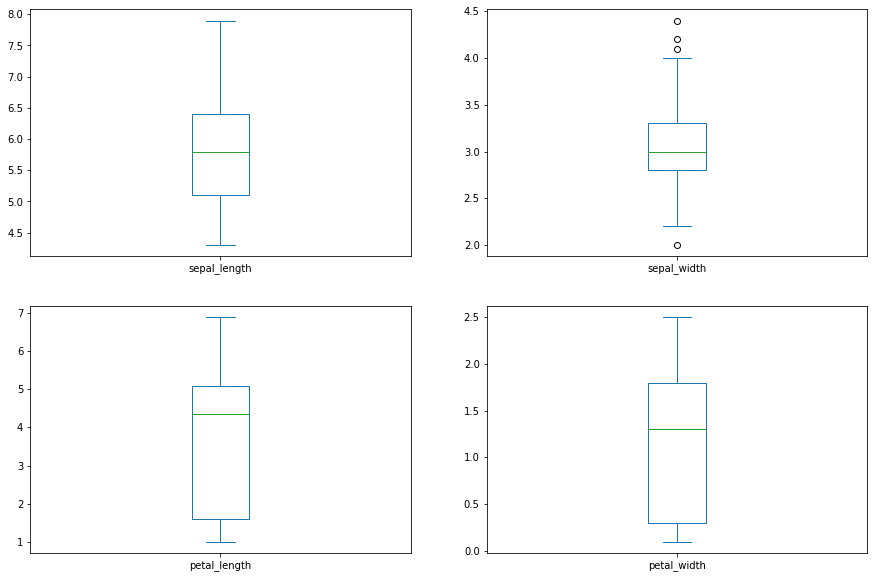

In [46]:
df.plot(kind='box', figsize=(15, 10), subplots=True, layout=(2, 2))

    - Afficher la matrice de correlation

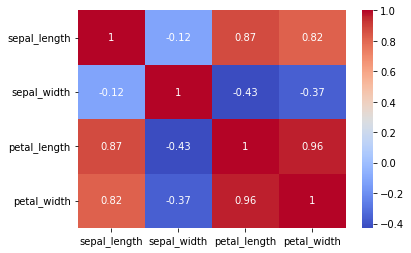

In [47]:
sns.heatmap(data=df.corr(), cmap='coolwarm', annot=True)
plt.show()

# 2. Pretraitement

### 2.1 - Outiliers

In [49]:
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


- Determier les quantiles

In [53]:
Q1 = df['sepal_width'].quantile(0.25)
Q3 = df['sepal_width'].quantile(0.75)

In [54]:
print(Q1, Q3)

2.8 3.3


 - Amplitude interquartile (IQR)

In [62]:
df_1 = df[(df['sepal_width'] > Q1) & (df['sepal_width'] < Q3)]

In [64]:
df_1.head()

,sepal_length,sepal_width,petal_length,petal_width,species
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


In [65]:
df_1.shape

(60, 5)

sepal_length       AxesSubplot(0.125,0.536818;0.352273x0.343182)
sepal_width     AxesSubplot(0.547727,0.536818;0.352273x0.343182)
petal_length          AxesSubplot(0.125,0.125;0.352273x0.343182)
petal_width        AxesSubplot(0.547727,0.125;0.352273x0.343182)
dtype: object

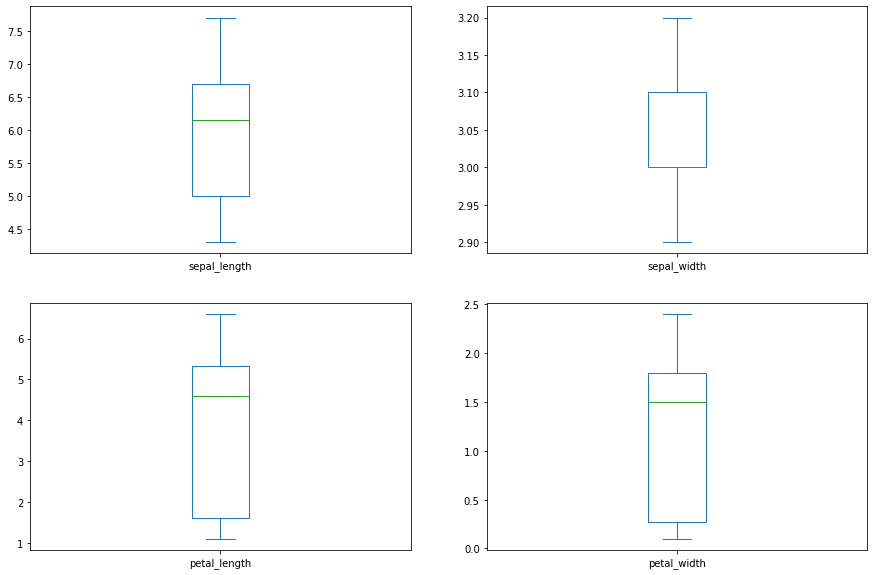

In [66]:
df_1.plot(kind='box', figsize=(15, 10), subplots=True, layout=(2, 2))

## 2.2 - Dupilicated

In [69]:
df[df.duplicated(keep=False)]

,sepal_length,sepal_width,petal_length,petal_width,species
101,5.8,2.7,5.1,1.9,virginica
142,5.8,2.7,5.1,1.9,virginica


In [70]:
df_2 = pd.concat((df.iloc[:142, :] , df.iloc[143:, :]))

In [71]:
df_2

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [72]:
df_2 = df.drop_duplicates()

In [73]:
df_2

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [74]:
df_2 = df_2.reset_index(drop=True)
df_2

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
144,6.7,3.0,5.2,2.3,virginica
145,6.3,2.5,5.0,1.9,virginica
146,6.5,3.0,5.2,2.0,virginica
147,6.2,3.4,5.4,2.3,virginica


## 2.3 - Imputing (valeurs manquantes)

In [75]:
df_sport = pd.read_csv('training/sport.csv')

In [76]:
df_sport

,Sport,Pois,Taille,Salaire
0,Football,75,173.0,600.0
1,Football,72,NaN,NaN
2,Tennis,68,172.0,NaN
3,Basketball,85,195.0,500.0
4,Basketball,92,210.0,600.0
5,Tennis,70,180.0,NaN
6,Tennis,69,175.0,NaN
7,BasketBall,81,188.0,172.0
8,Football,79,160.0,NaN
9,Football,85,178.0,800.0


    - Verifier la proportion des valeurs manquantes

In [77]:
(df_sport.isnull().sum() / df_sport.shape[0])

Sport      0.000000
Pois       0.000000
Taille     0.166667
Salaire    0.416667
dtype: float64

    - Remplacer par la moyenne

In [78]:
df_sport.mean(numeric_only=True)

Pois        78.250000
Taille     180.800000
Salaire    568.857143
dtype: float64

In [79]:
df_sport.fillna(value=df_sport.mean(numeric_only=True))

,Sport,Pois,Taille,Salaire
0,Football,75,173.0,600.000000
1,Football,72,180.8,568.857143
2,Tennis,68,172.0,568.857143
3,Basketball,85,195.0,500.000000
4,Basketball,92,210.0,600.000000
5,Tennis,70,180.0,568.857143
6,Tennis,69,175.0,568.857143
7,BasketBall,81,188.0,172.000000
8,Football,79,160.0,568.857143
9,Football,85,178.0,800.000000


    - Par la mediane

In [80]:
df_1 = pd.DataFrame(data={
    'col1': [3.0, 7.0, 5.0, 9.0, np.nan, 6.0],
    'col2': [0.42, 0.84, 0.63, np.nan, 0.98, 10.0]
})

In [81]:
df_1

,col1,col2
0,3.0,0.42
1,7.0,0.84
2,5.0,0.63
3,9.0,NaN
4,NaN,0.98
5,6.0,10.00


In [82]:
df_1.mean()

col1    6.000
col2    2.574
dtype: float64

In [83]:
df_1.median()

col1    6.00
col2    0.84
dtype: float64

In [84]:
df_1.fillna(value=df_1.median())

,col1,col2
0,3.0,0.42
1,7.0,0.84
2,5.0,0.63
3,9.0,0.84
4,6.0,0.98
5,6.0,10.00


    - remplacement localise

In [85]:
df_1

,col1,col2
0,3.0,0.42
1,7.0,0.84
2,5.0,0.63
3,9.0,NaN
4,NaN,0.98
5,6.0,10.00


In [86]:
df_1.fillna(method='ffill')

,col1,col2
0,3.0,0.42
1,7.0,0.84
2,5.0,0.63
3,9.0,0.63
4,9.0,0.98
5,6.0,10.00


In [87]:
df_sport

,Sport,Pois,Taille,Salaire
0,Football,75,173.0,600.0
1,Football,72,NaN,NaN
2,Tennis,68,172.0,NaN
3,Basketball,85,195.0,500.0
4,Basketball,92,210.0,600.0
5,Tennis,70,180.0,NaN
6,Tennis,69,175.0,NaN
7,BasketBall,81,188.0,172.0
8,Football,79,160.0,NaN
9,Football,85,178.0,800.0


In [88]:
football = df_sport[df_sport['Sport'] == 'Football']
tennis = df_sport[df_sport['Sport'] == 'Tennis']
basketBall = df_sport[df_sport['Sport'] == 'BasketBall']

In [89]:
football

,Sport,Pois,Taille,Salaire
0,Football,75,173.0,600.0
1,Football,72,NaN,NaN
8,Football,79,160.0,NaN
9,Football,85,178.0,800.0
10,Football,75,177.0,720.0


In [90]:
tennis

,Sport,Pois,Taille,Salaire
2,Tennis,68,172.0,NaN
5,Tennis,70,180.0,NaN
6,Tennis,69,175.0,NaN


In [91]:
basketBall

,Sport,Pois,Taille,Salaire
7,BasketBall,81,188.0,172.0


In [92]:
football.mean(numeric_only=True)

Pois        77.200000
Taille     172.000000
Salaire    706.666667
dtype: float64

In [93]:
tennis.mean(numeric_only=True)

Pois        69.000000
Taille     175.666667
Salaire           NaN
dtype: float64

In [94]:
df_sport[df_sport['Sport'] == 'Football'].fillna(value=football.mean(numeric_only=True))

,Sport,Pois,Taille,Salaire
0,Football,75,173.0,600.000000
1,Football,72,172.0,706.666667
8,Football,79,160.0,706.666667
9,Football,85,178.0,800.000000
10,Football,75,177.0,720.000000


In [95]:
df_sport[df_sport['Sport'] == 'Tennis'].fillna(value=tennis.mean(numeric_only=True))

,Sport,Pois,Taille,Salaire
2,Tennis,68,172.0,NaN
5,Tennis,70,180.0,NaN
6,Tennis,69,175.0,NaN


    - SimpleImputer (tres interessant pour faire un remplacement, si la valeur manquante n'est pas nan)

In [96]:
df_sport

,Sport,Pois,Taille,Salaire
0,Football,75,173.0,600.0
1,Football,72,NaN,NaN
2,Tennis,68,172.0,NaN
3,Basketball,85,195.0,500.0
4,Basketball,92,210.0,600.0
5,Tennis,70,180.0,NaN
6,Tennis,69,175.0,NaN
7,BasketBall,81,188.0,172.0
8,Football,79,160.0,NaN
9,Football,85,178.0,800.0


In [97]:
df_2 = df_sport.fillna(value=-1)
df_2

,Sport,Pois,Taille,Salaire
0,Football,75,173.0,600.0
1,Football,72,-1.0,-1.0
2,Tennis,68,172.0,-1.0
3,Basketball,85,195.0,500.0
4,Basketball,92,210.0,600.0
5,Tennis,70,180.0,-1.0
6,Tennis,69,175.0,-1.0
7,BasketBall,81,188.0,172.0
8,Football,79,160.0,-1.0
9,Football,85,178.0,800.0


In [98]:
# !pip install sklearn

In [102]:
from sklearn.impute import SimpleImputer

In [110]:
imp = SimpleImputer(missing_values=-1.0, strategy='mean')

In [111]:
X = imp.fit_transform(df_2[['Pois', 'Taille', 'Salaire']])
X

array([[ 75.        , 173.        , 600.        ],
       [ 72.        , 180.8       , 568.85714286],
       [ 68.        , 172.        , 568.85714286],
       [ 85.        , 195.        , 500.        ],
       [ 92.        , 210.        , 600.        ],
       [ 70.        , 180.        , 568.85714286],
       [ 69.        , 175.        , 568.85714286],
       [ 81.        , 188.        , 172.        ],
       [ 79.        , 160.        , 568.85714286],
       [ 85.        , 178.        , 800.        ],
       [ 75.        , 177.        , 720.        ],
       [ 88.        , 180.8       , 590.        ]])

In [112]:
df_3 = pd.DataFrame(data=X, columns=['Pois', 'Taille', 'Salaire'])
df_3

,Pois,Taille,Salaire
0,75.0,173.0,600.000000
1,72.0,180.8,568.857143
2,68.0,172.0,568.857143
3,85.0,195.0,500.000000
4,92.0,210.0,600.000000
5,70.0,180.0,568.857143
6,69.0,175.0,568.857143
7,81.0,188.0,172.000000
8,79.0,160.0,568.857143
9,85.0,178.0,800.000000


    - Normalization :permet de ramener les variables dans le meme ordre de grandeur

In [113]:
from sklearn.preprocessing import StandardScaler, RobustScaler

In [114]:
std = StandardScaler()

In [115]:
X_sc = std.fit_transform(df_3)
X_sc

array([[-4.24842651e-01, -6.48949312e-01,  2.19803859e-01],
       [-8.17005098e-01,  2.36464728e-15,  0.00000000e+00],
       [-1.33988836e+00, -7.32147942e-01,  0.00000000e+00],
       [ 8.82365506e-01,  1.18142054e+00, -4.85988348e-01],
       [ 1.79741122e+00,  2.42939999e+00,  2.19803859e-01],
       [-1.07844673e+00, -6.65589038e-02,  0.00000000e+00],
       [-1.20916754e+00, -4.82552053e-01,  0.00000000e+00],
       [ 3.59482243e-01,  5.99030134e-01, -2.80098679e+00],
       [ 9.80406117e-02, -1.73053150e+00,  0.00000000e+00],
       [ 8.82365506e-01, -2.32956163e-01,  1.63138827e+00],
       [-4.24842651e-01, -3.16154793e-01,  1.06675451e+00],
       [ 1.27452795e+00,  2.36464728e-15,  1.49224638e-01]])

In [116]:
std = RobustScaler()
X_sc = std.fit_transform(df_3)
X_sc

array([[ -0.14814815,  -0.74074074,   1.        ],
       [ -0.37037037,   0.22222222,   0.        ],
       [ -0.66666667,  -0.86419753,   0.        ],
       [  0.59259259,   1.97530864,  -2.21100917],
       [  1.11111111,   3.82716049,   1.        ],
       [ -0.51851852,   0.12345679,   0.        ],
       [ -0.59259259,  -0.49382716,   0.        ],
       [  0.2962963 ,   1.11111111, -12.74311927],
       [  0.14814815,  -2.34567901,   0.        ],
       [  0.59259259,  -0.12345679,   7.42201835],
       [ -0.14814815,  -0.24691358,   4.85321101],
       [  0.81481481,   0.22222222,   0.67889908]])

    - Encoding des variables

In [117]:
df_encode = pd.DataFrame(data={
        'cible': ['Tres insatisfait', 'Satisfait', 'Insatisfait', 'Neutre', 'Satisfait', 
                 'Tres satisfait']
})
df_encode

,cible
0,Tres insatisfait
1,Satisfait
2,Insatisfait
3,Neutre
4,Satisfait
5,Tres satisfait


In [118]:
from sklearn.preprocessing import LabelEncoder

In [119]:
le = LabelEncoder()
df_encode['cible_cat'] = le.fit_transform(df_encode['cible'])

In [120]:
df_encode

,cible,cible_cat
0,Tres insatisfait,3
1,Satisfait,2
2,Insatisfait,0
3,Neutre,1
4,Satisfait,2
5,Tres satisfait,4


In [121]:
le.inverse_transform([0, 1, 2, 3, 4])

array(['Insatisfait', 'Neutre', 'Satisfait', 'Tres insatisfait',
       'Tres satisfait'], dtype=object)

In [122]:
def ordinal_encode(item):
    ordinal_data = {
        'Tres insatisfait': 0,
        'Insatisfait': 1,
        'Neutre': 2,
        'Satisfait': 3,
        'Tres satisfait': 4
    }
    return ordinal_data[item]

In [123]:
df_encode['cible_cat_ord'] = df_encode['cible'].map(ordinal_encode)

In [124]:
df_encode

,cible,cible_cat,cible_cat_ord
0,Tres insatisfait,3,0
1,Satisfait,2,3
2,Insatisfait,0,1
3,Neutre,1,2
4,Satisfait,2,3
5,Tres satisfait,4,4


    - Encodage nominale

In [125]:
df = pd.DataFrame(data={
    'cible': ['Rouge', 'Vert', 'Rouge', 'Blanc']
})

In [126]:
df

,cible
0,Rouge
1,Vert
2,Rouge
3,Blanc


In [127]:
X = pd.get_dummies(df['cible'], drop_first=True)
X

,Rouge,Vert
0,1,0
1,0,1
2,1,0
3,0,0


In [128]:
pd.concat([df, X], axis=1)

,cible,Rouge,Vert
0,Rouge,1,0
1,Vert,0,1
2,Rouge,1,0
3,Blanc,0,0


    - Le drop first permet de supprimer l'une des colonnes repetitves

    - Conversion de type

In [129]:
df_sport

,Sport,Pois,Taille,Salaire
0,Football,75,173.0,600.0
1,Football,72,NaN,NaN
2,Tennis,68,172.0,NaN
3,Basketball,85,195.0,500.0
4,Basketball,92,210.0,600.0
5,Tennis,70,180.0,NaN
6,Tennis,69,175.0,NaN
7,BasketBall,81,188.0,172.0
8,Football,79,160.0,NaN
9,Football,85,178.0,800.0


In [130]:
df_sport.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Sport    12 non-null     object 
 1   Pois     12 non-null     int64  
 2   Taille   10 non-null     float64
 3   Salaire  7 non-null      float64
dtypes: float64(2), int64(1), object(1)
memory usage: 512.0+ bytes


In [131]:
df_sport['Pois'] = pd.to_numeric(df_sport['Pois'])

In [132]:
df_sport

,Sport,Pois,Taille,Salaire
0,Football,75,173.0,600.0
1,Football,72,NaN,NaN
2,Tennis,68,172.0,NaN
3,Basketball,85,195.0,500.0
4,Basketball,92,210.0,600.0
5,Tennis,70,180.0,NaN
6,Tennis,69,175.0,NaN
7,BasketBall,81,188.0,172.0
8,Football,79,160.0,NaN
9,Football,85,178.0,800.0


In [133]:
df_sport.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Sport    12 non-null     object 
 1   Pois     12 non-null     int64  
 2   Taille   10 non-null     float64
 3   Salaire  7 non-null      float64
dtypes: float64(2), int64(1), object(1)
memory usage: 512.0+ bytes


    - *Features Engineering*

In [134]:
df = pd.read_csv('training/billets.csv')

In [135]:
df

,Naissance,Date_Achat,Quantite,Num_billet,Prix
0,1997-05-20,2022-06-18,2,D20103,63.98
1,1980-10-21,2018-07-01,2,F18278,65.98
2,2006-04-09,2021-05-11,5,F19351,149.95
3,1981-07-13,2020-01-28,5,F19351,149.95
4,2000-03-03,2022-08-11,1,S18423,34.99
5,1994-04-01,2022-06-18,2,D20103,63.98
6,2009-04-01,2019-07-19,5,F19351,149.95
7,1982-03-27,2019-07-19,5,F19351,149.95
8,2006-10-17,2018-07-01,2,F18278,65.98
9,2009-07-27,2019-07-18,5,f19351,149.95


In [136]:
df['prix_unitaire'] = df['Prix'] / df['Quantite']

In [137]:
df

,Naissance,Date_Achat,Quantite,Num_billet,Prix,prix_unitaire
0,1997-05-20,2022-06-18,2,D20103,63.98,31.99
1,1980-10-21,2018-07-01,2,F18278,65.98,32.99
2,2006-04-09,2021-05-11,5,F19351,149.95,29.99
3,1981-07-13,2020-01-28,5,F19351,149.95,29.99
4,2000-03-03,2022-08-11,1,S18423,34.99,34.99
5,1994-04-01,2022-06-18,2,D20103,63.98,31.99
6,2009-04-01,2019-07-19,5,F19351,149.95,29.99
7,1982-03-27,2019-07-19,5,F19351,149.95,29.99
8,2006-10-17,2018-07-01,2,F18278,65.98,32.99
9,2009-07-27,2019-07-18,5,f19351,149.95,29.99


In [138]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Naissance      10 non-null     object 
 1   Date_Achat     10 non-null     object 
 2   Quantite       10 non-null     int64  
 3   Num_billet     10 non-null     object 
 4   Prix           10 non-null     float64
 5   prix_unitaire  10 non-null     float64
dtypes: float64(2), int64(1), object(3)
memory usage: 608.0+ bytes


In [139]:
df['Date_Achat'] = pd.to_datetime(df['Date_Achat'])
df['Naissance'] = pd.to_datetime(df['Naissance'])

In [140]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Naissance      10 non-null     datetime64[ns]
 1   Date_Achat     10 non-null     datetime64[ns]
 2   Quantite       10 non-null     int64         
 3   Num_billet     10 non-null     object        
 4   Prix           10 non-null     float64       
 5   prix_unitaire  10 non-null     float64       
dtypes: datetime64[ns](2), float64(2), int64(1), object(1)
memory usage: 608.0+ bytes


In [141]:
df['age'] = df['Date_Achat'] - df['Naissance']
df

,Naissance,Date_Achat,Quantite,Num_billet,Prix,prix_unitaire,age
0,1997-05-20,2022-06-18,2,D20103,63.98,31.99,9160 days
1,1980-10-21,2018-07-01,2,F18278,65.98,32.99,13767 days
2,2006-04-09,2021-05-11,5,F19351,149.95,29.99,5511 days
3,1981-07-13,2020-01-28,5,F19351,149.95,29.99,14078 days
4,2000-03-03,2022-08-11,1,S18423,34.99,34.99,8196 days
5,1994-04-01,2022-06-18,2,D20103,63.98,31.99,10305 days
6,2009-04-01,2019-07-19,5,F19351,149.95,29.99,3761 days
7,1982-03-27,2019-07-19,5,F19351,149.95,29.99,13628 days
8,2006-10-17,2018-07-01,2,F18278,65.98,32.99,4275 days
9,2009-07-27,2019-07-18,5,f19351,149.95,29.99,3643 days


In [142]:
df['age_year'] = df['Date_Achat'].dt.year - df['Naissance'].dt.year

In [143]:
df

,Naissance,Date_Achat,Quantite,Num_billet,Prix,prix_unitaire,age,age_year
0,1997-05-20,2022-06-18,2,D20103,63.98,31.99,9160 days,25
1,1980-10-21,2018-07-01,2,F18278,65.98,32.99,13767 days,38
2,2006-04-09,2021-05-11,5,F19351,149.95,29.99,5511 days,15
3,1981-07-13,2020-01-28,5,F19351,149.95,29.99,14078 days,39
4,2000-03-03,2022-08-11,1,S18423,34.99,34.99,8196 days,22
5,1994-04-01,2022-06-18,2,D20103,63.98,31.99,10305 days,28
6,2009-04-01,2019-07-19,5,F19351,149.95,29.99,3761 days,10
7,1982-03-27,2019-07-19,5,F19351,149.95,29.99,13628 days,37
8,2006-10-17,2018-07-01,2,F18278,65.98,32.99,4275 days,12
9,2009-07-27,2019-07-18,5,f19351,149.95,29.99,3643 days,10


- 0 a 14 -- Enfant
- 14 a 24 -- Adolescents
- 25 a 64 -- Adultes
- 65 -- Aines

In [144]:
def age_categories(item):
    if item <= 14:
        return "Enfant"
    if item <= 24:
        return "Adolescent"
    if item <= 64:
        return "Adulte"
    return "Aines"

In [145]:
df['age_categories'] = df['age_year'].map(age_categories)

In [146]:
df

,Naissance,Date_Achat,Quantite,Num_billet,Prix,prix_unitaire,age,age_year,age_categories
0,1997-05-20,2022-06-18,2,D20103,63.98,31.99,9160 days,25,Adulte
1,1980-10-21,2018-07-01,2,F18278,65.98,32.99,13767 days,38,Adulte
2,2006-04-09,2021-05-11,5,F19351,149.95,29.99,5511 days,15,Adolescent
3,1981-07-13,2020-01-28,5,F19351,149.95,29.99,14078 days,39,Adulte
4,2000-03-03,2022-08-11,1,S18423,34.99,34.99,8196 days,22,Adolescent
5,1994-04-01,2022-06-18,2,D20103,63.98,31.99,10305 days,28,Adulte
6,2009-04-01,2019-07-19,5,F19351,149.95,29.99,3761 days,10,Enfant
7,1982-03-27,2019-07-19,5,F19351,149.95,29.99,13628 days,37,Adulte
8,2006-10-17,2018-07-01,2,F18278,65.98,32.99,4275 days,12,Enfant
9,2009-07-27,2019-07-18,5,f19351,149.95,29.99,3643 days,10,Enfant


In [147]:
df['mois_Achat'] = df['Date_Achat'].dt.month

In [148]:
df

,Naissance,Date_Achat,Quantite,Num_billet,Prix,prix_unitaire,age,age_year,age_categories,mois_Achat
0,1997-05-20,2022-06-18,2,D20103,63.98,31.99,9160 days,25,Adulte,6
1,1980-10-21,2018-07-01,2,F18278,65.98,32.99,13767 days,38,Adulte,7
2,2006-04-09,2021-05-11,5,F19351,149.95,29.99,5511 days,15,Adolescent,5
3,1981-07-13,2020-01-28,5,F19351,149.95,29.99,14078 days,39,Adulte,1
4,2000-03-03,2022-08-11,1,S18423,34.99,34.99,8196 days,22,Adolescent,8
5,1994-04-01,2022-06-18,2,D20103,63.98,31.99,10305 days,28,Adulte,6
6,2009-04-01,2019-07-19,5,F19351,149.95,29.99,3761 days,10,Enfant,7
7,1982-03-27,2019-07-19,5,F19351,149.95,29.99,13628 days,37,Adulte,7
8,2006-10-17,2018-07-01,2,F18278,65.98,32.99,4275 days,12,Enfant,7
9,2009-07-27,2019-07-18,5,f19351,149.95,29.99,3643 days,10,Enfant,7


In [149]:
# dir(df['Date_Achat'].dt)

In [150]:
df['Date_Achat'].dt.day_name()

0    Saturday
1      Sunday
2     Tuesday
3     Tuesday
4    Thursday
5    Saturday
6      Friday
7      Friday
8      Sunday
9    Thursday
Name: Date_Achat, dtype: object

    - Les jours de la semaine

In [151]:
df['Achat_jour'] = df['Date_Achat'].dt.day_name()

In [152]:
df

,Naissance,Date_Achat,Quantite,Num_billet,Prix,prix_unitaire,age,age_year,age_categories,mois_Achat,Achat_jour
0,1997-05-20,2022-06-18,2,D20103,63.98,31.99,9160 days,25,Adulte,6,Saturday
1,1980-10-21,2018-07-01,2,F18278,65.98,32.99,13767 days,38,Adulte,7,Sunday
2,2006-04-09,2021-05-11,5,F19351,149.95,29.99,5511 days,15,Adolescent,5,Tuesday
3,1981-07-13,2020-01-28,5,F19351,149.95,29.99,14078 days,39,Adulte,1,Tuesday
4,2000-03-03,2022-08-11,1,S18423,34.99,34.99,8196 days,22,Adolescent,8,Thursday
5,1994-04-01,2022-06-18,2,D20103,63.98,31.99,10305 days,28,Adulte,6,Saturday
6,2009-04-01,2019-07-19,5,F19351,149.95,29.99,3761 days,10,Enfant,7,Friday
7,1982-03-27,2019-07-19,5,F19351,149.95,29.99,13628 days,37,Adulte,7,Friday
8,2006-10-17,2018-07-01,2,F18278,65.98,32.99,4275 days,12,Enfant,7,Sunday
9,2009-07-27,2019-07-18,5,f19351,149.95,29.99,3643 days,10,Enfant,7,Thursday


### Aller plus loin

https://openclassrooms.com/fr/courses/7410486-nettoyez-et-analysez-votre-jeu-de-donnees

https://datapeaker.com/fr/Big-Data/eda-analyse-exploratoire-des-donn%C3%A9es-%C3%A0-partir-de-z%C3%A9ro/

https://experienceleague.adobe.com/docs/experience-platform/data-science-workspace/jupyterlab/eda-notebook.html?lang=fr